In [63]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data = pd.merge(ride_data, city_data, on = "city", how = "left")
# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

D:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'city' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
D:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
D:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


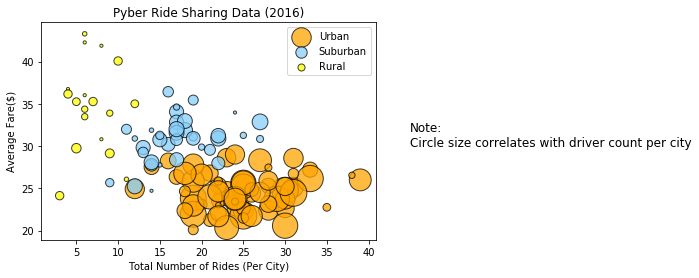

In [108]:
# Obtain the x and y coordinates for each of the three city types
ride_data["city"].value_counts()
ride_group = ride_data.groupby(["city"])
fare_info = ride_group["fare"].sum()
ride_num = ride_group["fare"].count()
fare_aver = fare_info / ride_num
city_name = fare_aver.index
df_1 = pd.DataFrame({"city":city_name,"fare_aver":fare_aver,"ride_num":ride_num,"fare_total":fare_info})
df_2 = pd.merge(city_data,df_1,on = "city")

data_urban = df_2.loc[df_2["type"] == "Urban"]
data_suburban = df_2.loc[df_2["type"] == "Suburban"]
data_rural = df_2.loc[df_2["type"] == "Rural"]

x_urban = np.array(data_urban["ride_num"])
y_urban = np.array(data_urban["fare_aver"])
x_suburban = np.array(data_suburban["ride_num"])
y_suburban = np.array(data_suburban["fare_aver"])
x_rural = np.array(data_rural["ride_num"])
y_rural = np.array(data_rural["fare_aver"])

# Build the scatter plots for each city types
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.hold(True)
ax1.scatter(x_urban, y_urban, marker="o", facecolors="orange", edgecolors="black", s=10 * data_urban["driver_count"], alpha=0.75, label = "Urban")
ax1.scatter(x_suburban, y_suburban, marker="o", facecolors="lightskyblue", edgecolors="black", s= 10 * data_suburban["driver_count"], alpha=0.75, label = "Suburban")
ax1.scatter(x_rural, y_rural, marker="o", facecolors="yellow", edgecolors="black", s=10 * data_rural["driver_count"], alpha=0.75, label = "Rural")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
# Create a legend
plt.legend(loc = "upper right")
# Incorporate a text label regarding circle size
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.text(45, 30, "Note:\nCircle size correlates with driver count per city", fontsize=12)
# Save Figure
plt.savefig("fig_1.png")



In [59]:
# Show plot
plt.show()

## Total Fares by City Type

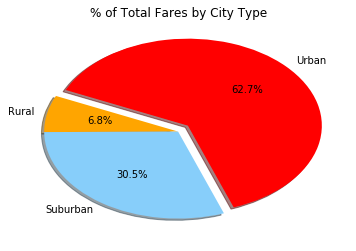

In [114]:
# Calculate Type Percents
sizes = []
sizes.append(data_urban["fare_total"].sum())
sizes.append(data_rural["fare_total"].sum())
sizes.append(data_suburban["fare_total"].sum())

labels = ["Urban", "Rural", "Suburban"]
colors = ["red","orange","lightskyblue"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=290)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("fig_2.png")

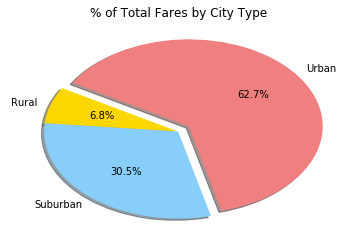

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

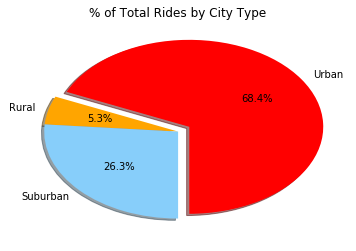

In [113]:
# Calculate Ride Percents
sizes = []
sizes.append(data_urban["ride_num"].sum())
sizes.append(data_rural["ride_num"].sum())
sizes.append(data_suburban["ride_num"].sum())

labels = ["Urban", "Rural", "Suburban"]
colors = ["red","orange","lightskyblue"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("fig_3.png")


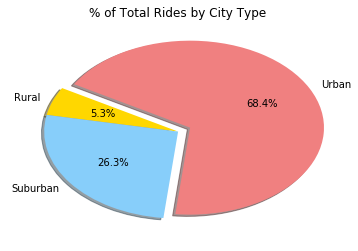

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

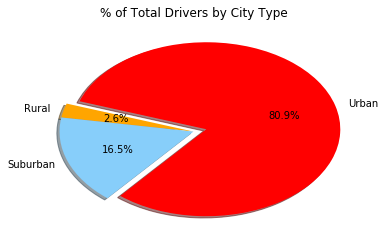

In [118]:
# Calculate Driver Percents
sizes = []
sizes.append(data_urban["driver_count"].sum())
sizes.append(data_rural["driver_count"].sum())
sizes.append(data_suburban["driver_count"].sum())

labels = ["Urban", "Rural", "Suburban"]
colors = ["red","orange","lightskyblue"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=230)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("fig_4.png")


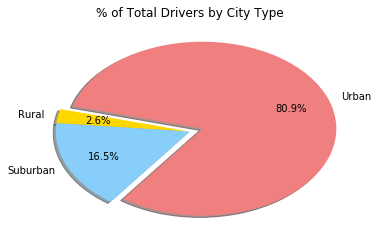

In [6]:
# Show Figure
plt.show()